# Data Analysis - Lab 3
### M. Sébastien MASCHA & M. Sauvage Pierre
### ISEP Paris – September 24th, 2019
<br/>
<br/>

___
# Import of libraries

This document has been done using python on Jupyter Notebook with the librairies:
 
- Numpy to manipulate arrays
- matplotlib to plot graphics
- pandas to import csv
- scipy for mathematicals usage
- maths for sqrt, pi, exp

In [1]:
# coding: utf-8

import data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
from math import sqrt,pi,exp
from scipy.stats.stats import pearsonr

# Exercice B -MDS, LLE and Isomap
In this exercice, we study the ”golub” data set. 
#### Question 1 - Load the 􏰂le Golub_data

We use the semicolon separator because we saw in the text editor that the data was separated
by semicolon.

In [2]:
dataframe = pd.read_csv("data/golub_data.csv", sep=',')
print(dataframe.shape)

(7129, 72)


#### Question 2 - Apply the function describe(·) to your data set. What does this function do ? Comment the results on your data.

In [4]:
dataframe.head()

,Ex 1,Ex 2,Ex 3,Ex 4,Ex 5,Ex 6,Ex 7,Ex 8,Ex 9,Ex 10,...,Ex 63,Ex 64,Ex 65,Ex 66,Ex 67,Ex 68,Ex 69,Ex 70,Ex 71,Ex 72
G 1,-214,-139,-76,-135,-106,-138,-72,-413,5,-88,...,-90,-137,-157,-172,-47,-62,-58,-161,-48,-176
G 2,-153,-73,-49,-114,-125,-85,-144,-260,-127,-105,...,-87,-51,-370,-122,-442,-198,-217,-215,-531,-284
G 3,-58,-1,-307,265,-76,215,238,7,106,42,...,102,-82,-77,38,-21,-5,63,-46,-124,-81
G 4,88,283,309,12,168,71,55,-2,268,219,...,319,178,340,31,396,141,95,146,431,9
G 5,-295,-264,-376,-419,-230,-272,-399,-541,-210,-178,...,-283,-135,-438,-201,-351,-256,-191,-172,-496,-294


Function pandas.DataFrame.describe :

- Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

- Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

About mansize.csv data ?

- We observe that most of the variables have an average value close to the median and the 1st and 3rd quartiles are almost symmetrical around the mean. This means that the data set is quite homogenous and that most of these variables follow a normal distribution.

#### Question 3 - Display the histograms of the different attributes. What can you say about their distributions ?

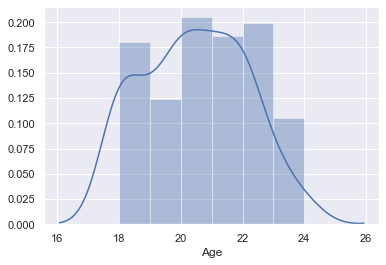

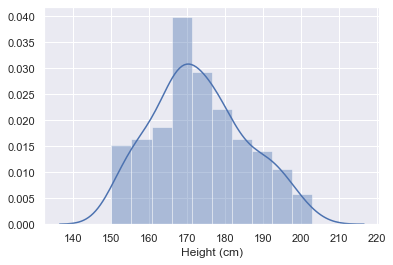

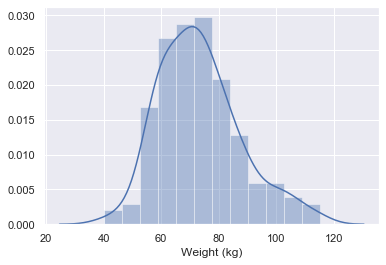

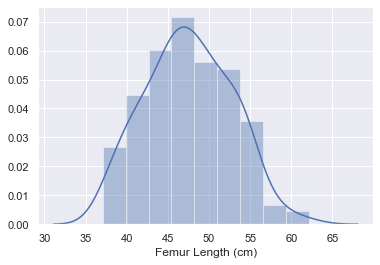

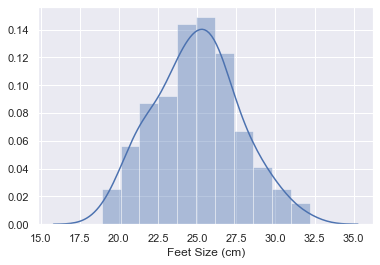

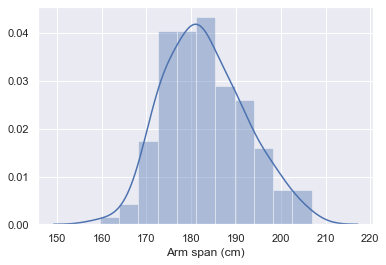

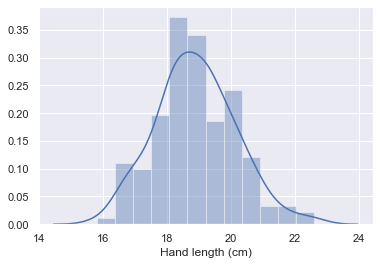

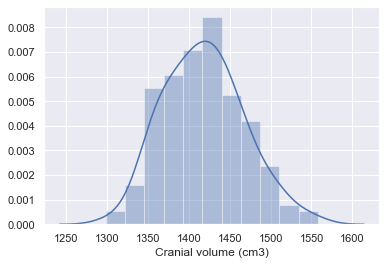

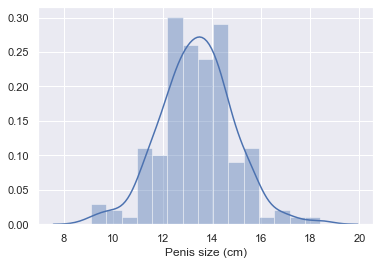

In [29]:
for column in dataframe : 
    sns.distplot(dataframe[column]) 
    plt.show()

#### Question 4 - Use the commands corr(), subplots(), heatmap() and pairplot() to visualize the correlation between the different variables. Comment your results. In particular, what can you say about the use in archaeology of the femur length to predict the height of an individual ?

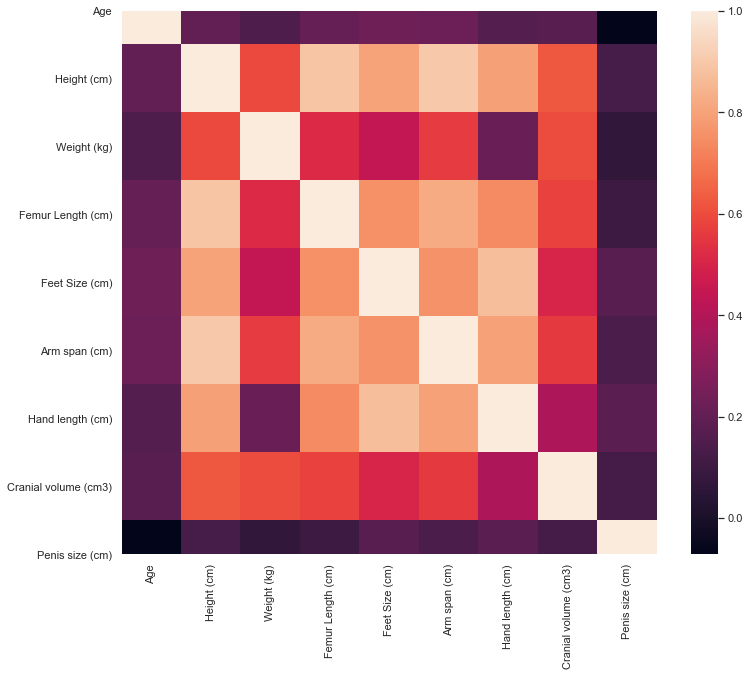

In [34]:
df_corr = dataframe.corr()
figure,axe = plt.subplots(figsize=(12,10))
sns.heatmap(df_corr)

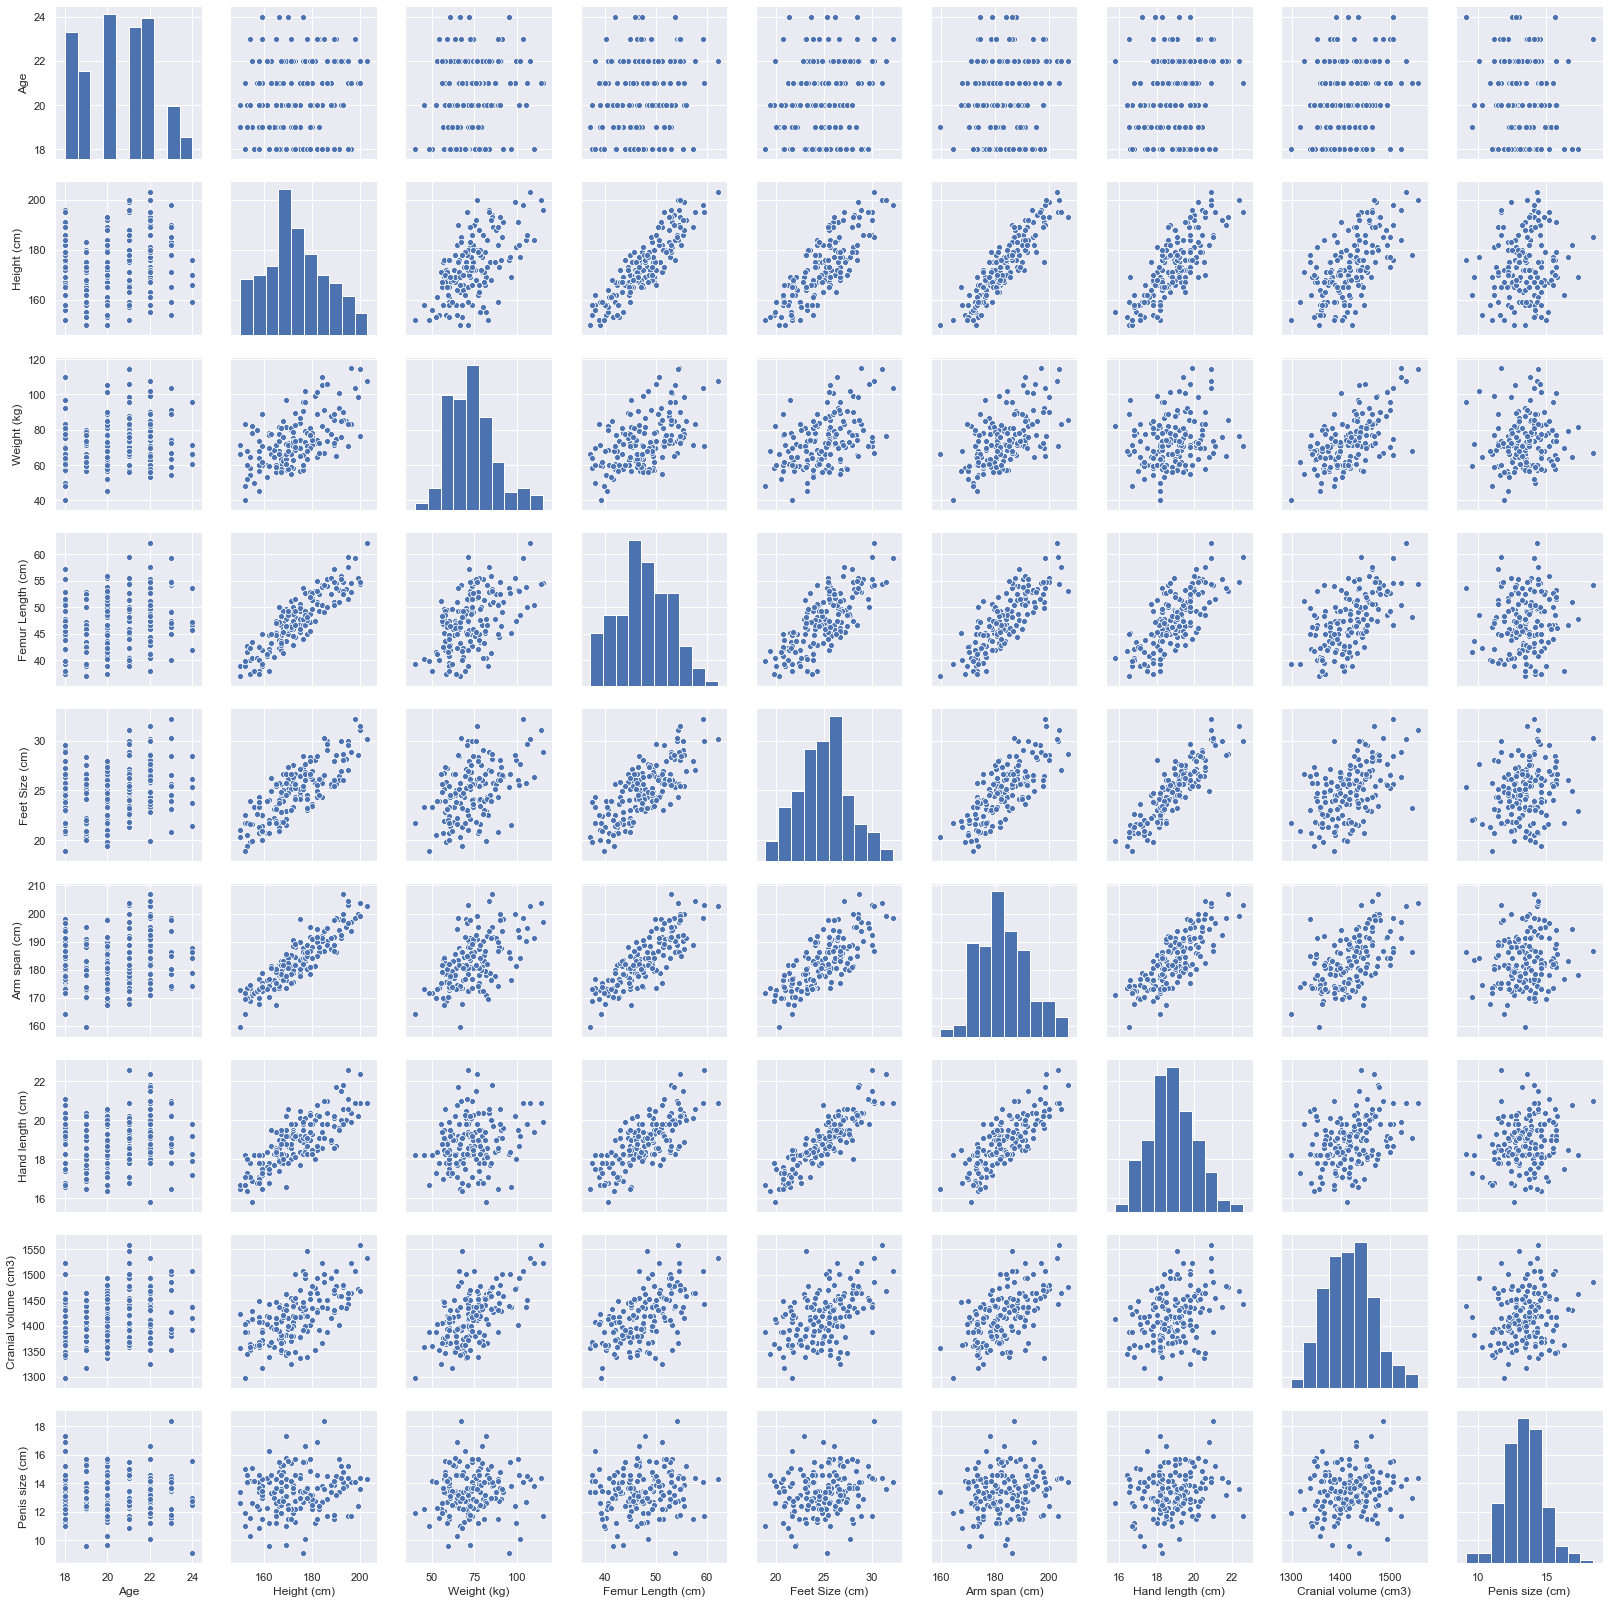

In [26]:
sns.pairplot(dataframe)

#### Question 5 - Compute the confidence intervals for the correlation coefficients (we will suppose that the attributes are following a normal distribution). Comment your results.

In [42]:
def IC95(a,b):
    r = pearsonr(a,b)[0]
    Z = np.log(abs(1 + r)) - np.log(abs(1 - r))/2
    sz = sqrt(1/(len(a) - 3))
    Zinf = Z - 1.96*sz
    Zsup = Z + 1.96*sz
    ic_interval = [(exp(2*Zinf) - 1)/(exp(2*Zinf) + 1), (exp(2*Zsup) - 1)/(exp(2*Zsup) + 1)]
    return ic_interval  

# Calcul des 16 intervalles de confiance à 95% :
for i in range(dataframe.shape[1]):
    for j in range(dataframe.shape[1]):
        print(IC95(dataframe.values[:,i],dataframe.values[:,j]))

[nan, nan]
[0.13426981777053296, 0.41938373810452045]
[0.06035688449301633, 0.3559920722670827]
[0.1550204052207662, 0.4366943233822553]
[0.1751305926080555, 0.4532739744948389]
[0.16815644198526442, 0.4475459190283694]
[0.0887412499451348, 0.38066213211057265]
[0.10693257323975644, 0.39625746160692854]
[-0.2588919772266451, 0.046903597018188345]
[0.13426981777053296, 0.41938373810452045]
[nan, nan]
[0.6389565094017534, 0.7888073290213987]
[0.9197188757950654, 0.9561567588569714]
[0.8466097523006582, 0.9147568587731572]
[0.9295649109392146, 0.9616232266107839]
[0.8370486424958964, 0.9092347028400082]
[0.6746510962043446, 0.8113917905064472]
[0.032076467069970915, 0.33099559346489804]
[0.06035688449301633, 0.3559920722670827]
[0.6389565094017534, 0.7888073290213987]
[0.9999999999999997, 1.0]
[0.5544844868835288, 0.7336987196236355]
[0.46038938471837654, 0.6694047245794875]
[0.6044785482041218, 0.7666015712819692]
[0.16368253010302636, 0.4438592656734183]
[0.6481288671477571, 0.794649695

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


It appears that there is a strong link between the height and the length of the femur as well as with the span of the arm which have a coefficient of determination of around 0.8.

There is also a 0.64 and 0.62 coefficient of determination between the height and the size of the feet as well as with the length of the hand, making them less strongly linked.

We observe about a 0.55 determination between the length of the femur and the size of the feet as well as with the length of the hand. It shows are strong they're linked.

Furthermore, penis' size is definitely not linked with attributes provided.